In [727]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier


In [728]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cellula/EDA/first inten project.csv')
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


# Data Cleaning & Preprocessing

*   List item
*   List item



In [729]:
# Get dataset information
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  fl

In [730]:
# Check for missing values
print(df.isnull().sum())


Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [731]:
# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())



Number of duplicate rows: 0


In [732]:
# Remove whitespace from column names
df.columns = df.columns.str.strip()

In [733]:
# Convert to datetime
df['date of reservation'] = pd.to_datetime(df['date of reservation'], format='%m/%d/%Y', errors='coerce')
# Check for conversion issues (if any dates could not be parsed)
print(df['date of reservation'].isnull().sum())


37


In [734]:
# Remove rows where 'date of reservation' could not be parsed
df = df.dropna(subset=['date of reservation'])

# Verify that there are no invalid dates remaining
print(df['date of reservation'].isnull().sum())


0


# Feature Engineering


In [735]:
# Total Stay Duration: total_nights = number of weekend nights + number of week nights.
df["total_nights"] = df["number of weekend nights"] + df["number of week nights"]

# Total Guests: total_guests = number of adults + number of children.
df["total_guests"] = df["number of adults"] + df["number of children"]


<ipython-input-735-4144bdc9379a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_nights"] = df["number of weekend nights"] + df["number of week nights"]
<ipython-input-735-4144bdc9379a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_guests"] = df["number of adults"] + df["number of children"]


In [736]:
# Lead Time Bins: Categorize lead time into ranges
def lead_time_bin(lead_time):
    if lead_time <= 7:
        return '0-7'
    elif lead_time <= 30:
        return '8-30'
    elif lead_time <= 90:
        return '31-90'
    else:
        return '90+'

# apply lead_time_bin fun
df['lead_time_bin'] = df['lead time'].apply(lead_time_bin)



<ipython-input-736-01258fd99f04>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lead_time_bin'] = df['lead time'].apply(lead_time_bin)


In [737]:
# Date Features: Extract month, season, and year from the reservation date.
df['reservation_month'] = df['date of reservation'].dt.month
df['reservation_year'] = df['date of reservation'].dt.year

# Define a function to determine season from month (using meteorological seasons )
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['reservation_season'] = df['reservation_month'].apply(get_season)

<ipython-input-737-b1791261fdcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_month'] = df['date of reservation'].dt.month
<ipython-input-737-b1791261fdcc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_year'] = df['date of reservation'].dt.year
<ipython-input-737-b1791261fdcc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [738]:
# Drop Irrelevant Columns:
df.drop(columns=['Booking_ID', 'P-C', 'P-not-C', 'date of reservation'], inplace=True)


<ipython-input-738-a9f9511c2a14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Booking_ID', 'P-C', 'P-not-C', 'date of reservation'], inplace=True)


# Exploratory Data Analysis (EDA)

<ipython-input-739-5157ad6a1a6f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='booking status', palette='viridis')


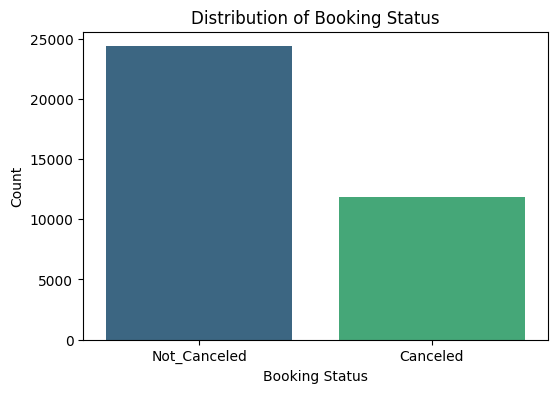

In [739]:
# Target Distribution: Distribution of 'booking status'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='booking status', palette='viridis')
plt.title('Distribution of Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()


In [740]:
# Check percentage distribution for booking status:
status_counts = df['booking status'].value_counts(normalize=True) * 100
print("Cancellation Status Distribution (%):\n", status_counts)


Cancellation Status Distribution (%):
 booking status
Not_Canceled    67.22026
Canceled        32.77974
Name: proportion, dtype: float64


##High Non-Cancellation Rate (Business Stability)
- Since the majority of bookings are not canceled, this suggests that most customers follow through with their reservations.

- This indicates business stability, as lower cancellation rates lead to more predictable revenue and better inventory management.

## Possible Reasons:

- Strong customer commitment due to attractive pricing, policies, or loyalty programs.

- Effective customer support, reducing last-minute cancellations.

- Favorable cancellation policies that discourage last-minute changes.


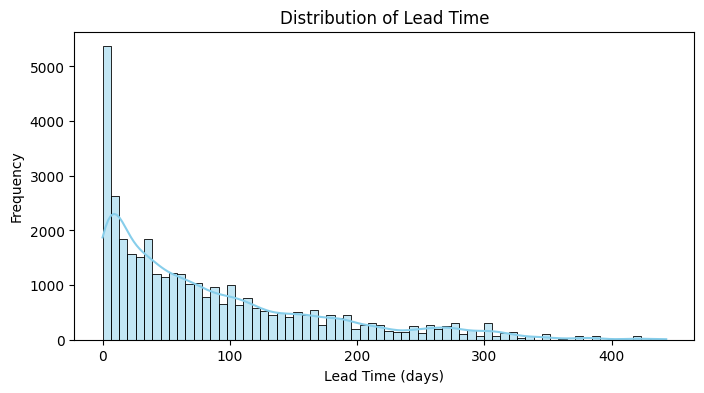

In [741]:
# Numerical Features Analysis

# Plot distribution of lead time
plt.figure(figsize=(8, 4))
sns.histplot(df['lead time'], kde=True, color='skyblue')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

##Lead Time Insights
- High last-minute bookings → Many customers book close to the stay date.
- Advance bookings exist → Likely for vacations or events.
- Revenue opportunities → Use last-minute deals & early-bird discounts.
- Dynamic pricing → Adjust prices based on booking time.
- Cancellation risks → Longer lead times may mean higher cancellation rates.
- Operational planning → Helps manage room availability & staffing efficiently.

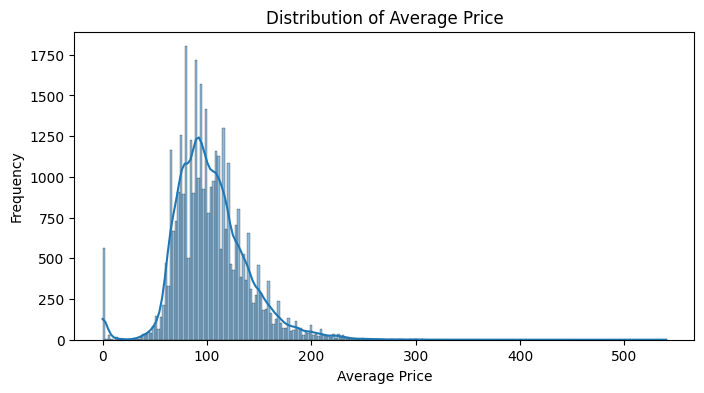

In [742]:
# Plot distribution of average price
plt.figure(figsize=(8,4))
sns.histplot(df['average price'], kde=True)
plt.title('Distribution of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()


## Average Price Insights

- Right-skewed distribution: Most prices fall between 50-150, with a few high-value outliers.

- Potential outliers: Prices above 300-500 could indicate luxury bookings or data anomalies.

- Common price range: Demand drops significantly after 150, suggesting price sensitivity.

- Business impact: Focus on budget-friendly pricing, with a niche opportunity for premium services.

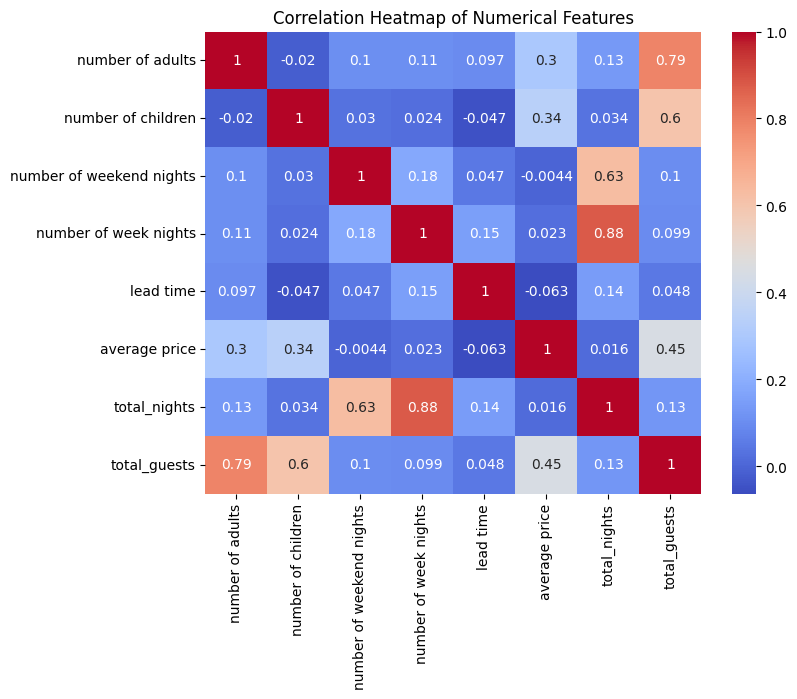

In [743]:
# Correlation heatmap (including numerical features only)
numerical_features = ['number of adults', 'number of children', 'number of weekend nights',
                      'number of week nights', 'lead time', 'average price', 'total_nights', 'total_guests']
corr = df[numerical_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Correlation Insights

- Total guests strongly correlate with adults (0.79) and children (0.6).
- Total nights and week nights have a high correlation (0.88).
- Average price moderately correlates with total guests (0.45).
- Lead time has little impact on price (-0.063).
- Larger guest groups and longer stays influence pricing the most.

<ipython-input-744-73ab8a63a1d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking status', y='lead time', data=df, palette='Set2')


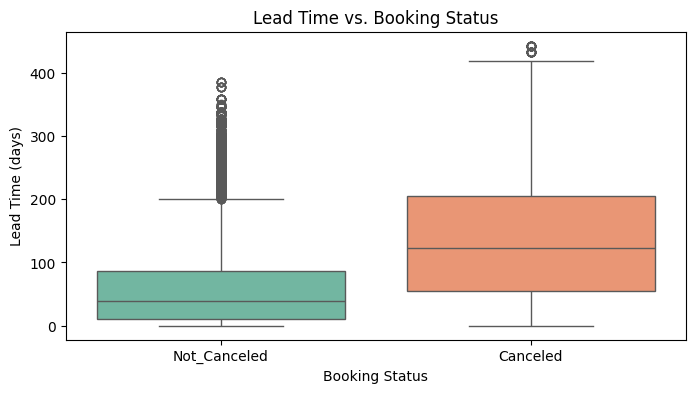

In [744]:
# Compare numerical features with cancellation status using boxplots

# Lead time vs. booking status
plt.figure(figsize=(8, 4))
sns.boxplot(x='booking status', y='lead time', data=df, palette='Set2')
plt.title('Lead Time vs. Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time (days)')
plt.show()

##  Insights

- Higher lead times are associated with more cancellations.

- Non-canceled bookings tend to have shorter lead times.

- Cancellations show a wider spread, with many bookings made months in advance.

- Long lead times increase the likelihood of cancellations.

<ipython-input-745-d736b6f5212e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking status', y='average price', data=df, palette='Set2')


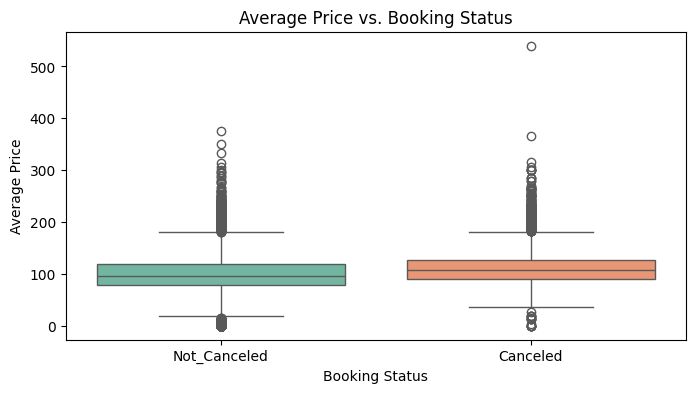

In [745]:
# Average price vs. booking status
plt.figure(figsize=(8, 4))
sns.boxplot(x='booking status', y='average price', data=df, palette='Set2')
plt.title('Average Price vs. Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Average Price')
plt.show()

## Average Price vs. Booking Status Insights

- Price Influence on Cancellations → Higher prices might correlate with more cancellations.

- Budget-Conscious Customers → Lower-priced bookings tend to be completed more often.

- Revenue Strategy → Offering discounts or flexible pricing could reduce cancellations.

- Segmentation Opportunities → Identify customer groups that book at different price points.

- Cancellation Policies → Stricter policies for high-priced bookings may help reduce risks.








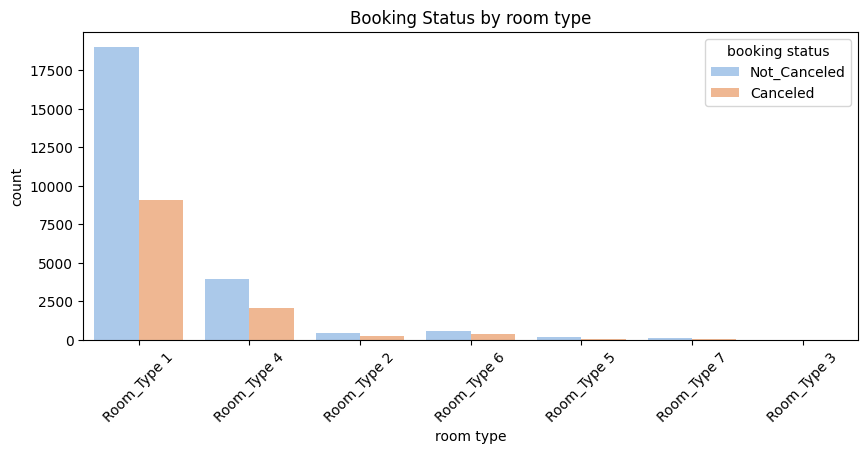

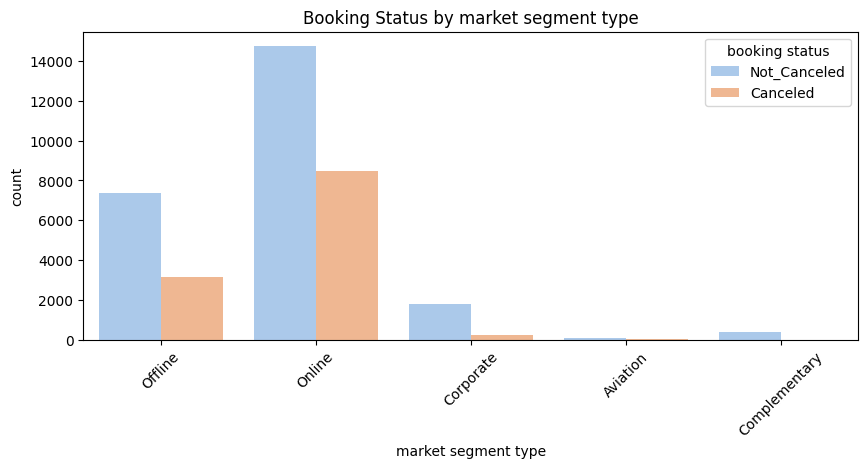

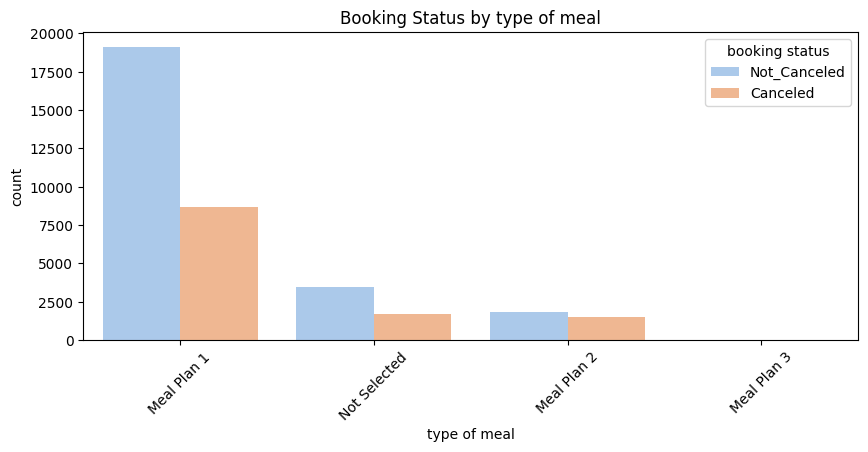

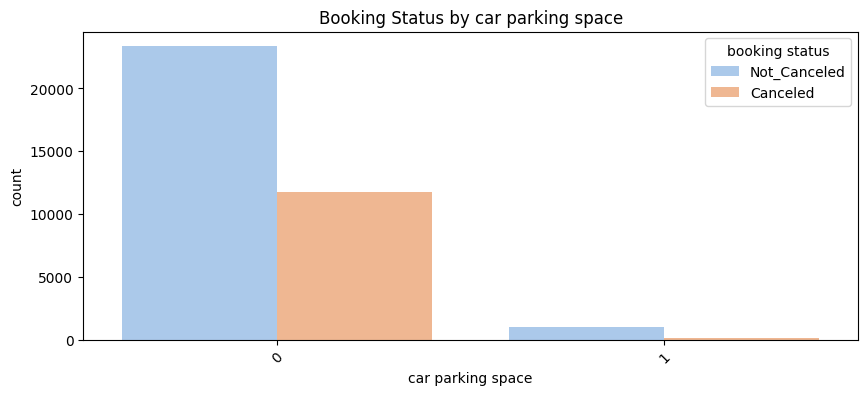

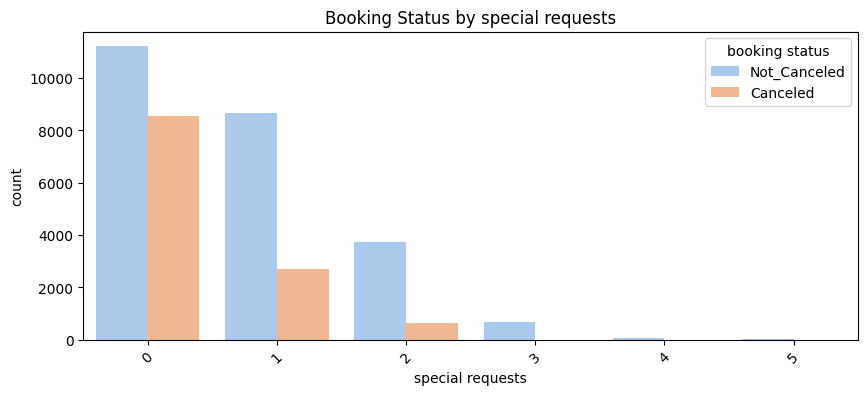

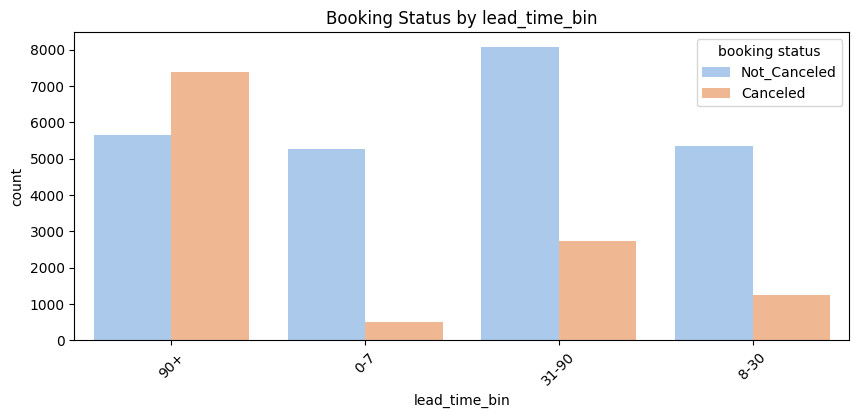

In [746]:
# Categorical Features

# List of categorical features to analyze
cat_features = ['room type', 'market segment type', 'type of meal', 'car parking space', 'special requests', 'lead_time_bin']

for feature in cat_features:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=feature, hue='booking status', palette='pastel')
    plt.title(f'Booking Status by {feature}')
    plt.xticks(rotation=45)
    plt.show()

## Insights from Categorical Features Analysis

- Room Type → Some room types have higher cancellations.
- Market Segment → Direct vs. third-party bookings affect cancellation rates.
- Meal Type → Premium meal plans may reduce cancellations.
- Parking Space → Availability influences booking decisions.
- Special Requests → Customers with requests cancel less.
- Lead Time → Longer lead times tend to have more cancellations.

<ipython-input-747-128bcddc49e7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking status', y='lead time', data=df, palette='coolwarm')


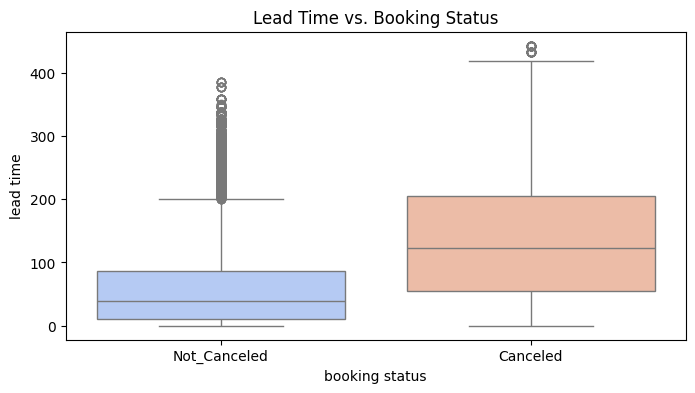

In [747]:
# Key Questions:
# 1. Does longer lead time increase cancellations?
plt.figure(figsize=(8,4))
sns.boxplot(x='booking status', y='lead time', data=df, palette='coolwarm')
plt.title('Lead Time vs. Booking Status')
plt.show()



## Key Insight:
- Longer lead times tend to have higher cancellations.
- Canceled bookings show a higher median lead time.
- Customers booking far in advance may cancel due to changes in plans.
- Short lead times often indicate confirmed stays with lower cancellation rates.



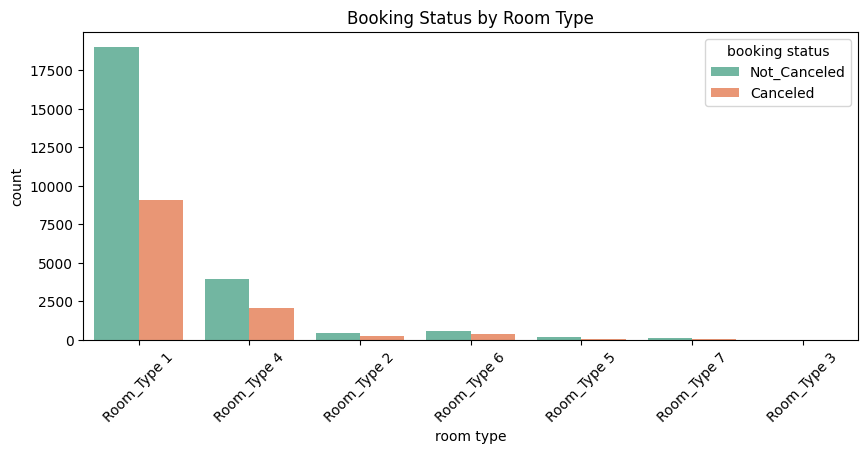

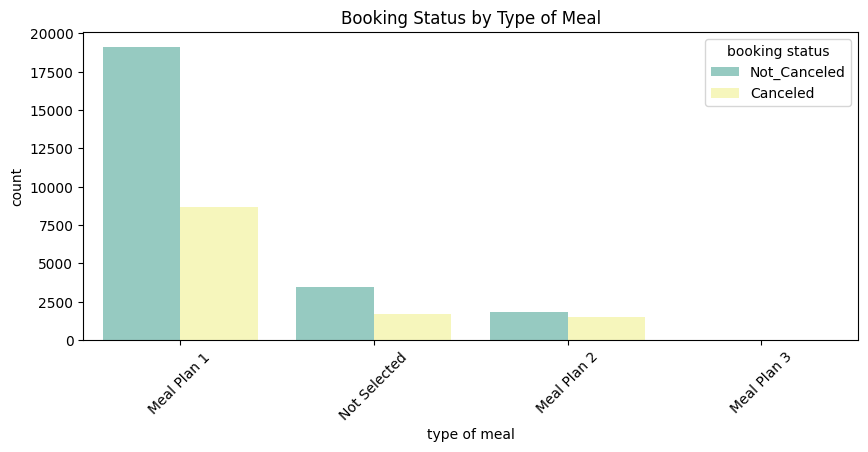

In [748]:
# 2. Are certain room types or meal plans linked to higher cancellations?
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='room type', hue='booking status', palette='Set2')
plt.title('Booking Status by Room Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(data=df, x='type of meal', hue='booking status', palette='Set3')
plt.title('Booking Status by Type of Meal')
plt.xticks(rotation=45)
plt.show()

## Key Insights:
Room Type & Cancellations:

- Certain room types may have higher cancellation rates.
- Premium or luxury rooms could attract more cancellations due to higher costs.

Meal Plan & Cancellations:

- Some meal plans may be linked to higher cancellations.
- Guests might prefer flexibility in dining and cancel when better options arise.


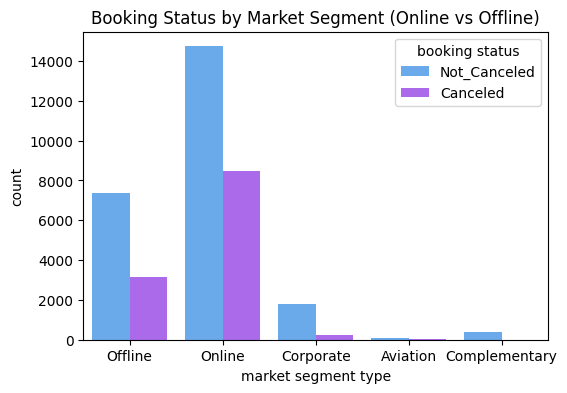

In [749]:
# 3. Do online bookings cancel more often than offline?
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='market segment type', hue='booking status', palette='cool')
plt.title('Booking Status by Market Segment (Online vs Offline)')
plt.show()

# Key Insights:

Online vs. Offline Cancellations:

- Online bookings may show a higher cancellation rate.
- Offline bookings tend to be more stable.

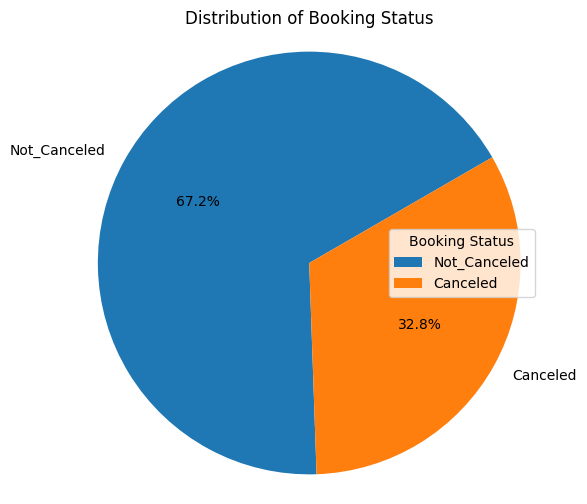

In [750]:
# check the balance of the target class
def balanced_plot(data):
    plt.figure(figsize=(6, 6))

    # Get value counts
    counts = data['booking status'].value_counts()

    # Create Pie Chart
    plt.pie(counts, labels=counts.keys(), autopct='%1.1f%%', startangle=30)
    plt.axis('equal')
    plt.legend(title="Booking Status")
    plt.title('Distribution of Booking Status')

    plt.show()

# Call the function
balanced_plot(df)

In [751]:
# Using IQR Method
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

num_features = ['lead time', 'average price', 'number of adults', 'number of children']
for col in num_features:
    df = remove_outliers(df, col)


In [752]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical features
categorical_cols = ['room type', 'market segment type', 'type of meal', 'car parking space', 'special requests', 'lead_time_bin','reservation_season']

# Apply OneHotEncoder to categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_array = encoder.fit_transform(df[categorical_cols])

# Convert to DataFrame with correct column names
encoded_features = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Reset index to match the original DataFrame
encoded_features.index = df.index

# Drop original categorical columns and concatenate the encoded ones
df = df.drop(columns=categorical_cols).join(encoded_features)

# Encode the target column
label_encoder = LabelEncoder()
df['booking status'] = label_encoder.fit_transform(df['booking status'])


# Check transformed dataset
df.head()


,number of adults,number of children,number of weekend nights,number of week nights,lead time,repeated,average price,booking status,total_nights,total_guests,...,special requests_4,special requests_5,lead_time_bin_0-7,lead_time_bin_31-90,lead_time_bin_8-30,lead_time_bin_90+,reservation_season_Autumn,reservation_season_Spring,reservation_season_Summer,reservation_season_Winter
9,2,0,0,5,44,0,133.44,1,5,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12,2,0,2,1,30,0,88.00,0,3,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
14,2,0,0,2,47,0,94.50,1,2,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
15,2,0,0,2,256,0,115.00,0,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
17,2,0,1,3,1,0,96.00,1,4,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [753]:
from sklearn.model_selection import train_test_split

# Define target variable
target_col = 'booking status'
X = df.drop(columns=[target_col])
y = df[target_col]

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (17697, 42), (17697,)
Testing set: (4425, 42), (4425,)


In [754]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle Class Imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [755]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1451
           1       0.91      0.92      0.91      2974

    accuracy                           0.88      4425
   macro avg       0.87      0.86      0.87      4425
weighted avg       0.88      0.88      0.88      4425



Text(0.5, 1.0, 'Confusion Matrix')

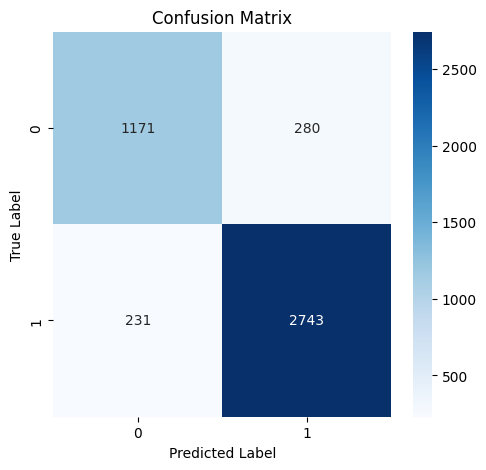

In [756]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)

plt.figure(figsize=(12, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

In [757]:
# Define the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:35:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1451
           1       0.90      0.91      0.90      2974

    accuracy                           0.87      4425
   macro avg       0.85      0.85      0.85      4425
weighted avg       0.87      0.87      0.87      4425



Text(0.5, 1.0, 'Confusion Matrix')

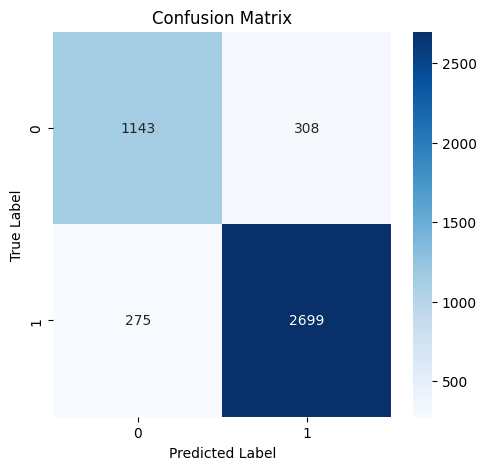

In [758]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)

plt.figure(figsize=(12, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")